In [1]:
from lib import leaf_metrics, load_vectors
from scipy.cluster.hierarchy import linkage
from tg.grammar_ru import *
import pandas as pd

In [2]:
FOLDER = Loc.data_cache_path/'Martin'
db = DataBundle.load(FOLDER/'bundle.zip')
word_to_normal_form = db.words.set_index('word').nf_n.to_dict()
id_to_nf = db.nfs.nf.to_dict()

In [3]:
tuning_candidates = pd.read_csv(FOLDER/'tuning_candidates.csv', sep='\t').set_index('nf_n')
all_freq_nnf = tuning_candidates[tuning_candidates.in_freq_prop | 
                                 tuning_candidates.is_name_by_cnt].index.values
cnt_nfs = db.words.groupby('nf_n')['cap_cnt'].sum()
top_100_names = cnt_nfs[cnt_nfs.index.isin(all_freq_nnf)].sort_values(ascending=False).iloc[:100].index

In [4]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(lnk, labels):
    plt.figure(figsize=(25, 50))
    plt.vlines(0.2, 0, 10000)
    plt.vlines(0.3, 0, 10000)
    plt.vlines(0.4, 0, 10000)
    
    dendrogram(
        lnk,
        leaf_font_size=20., 
        orientation='left',
        leaf_label_func=lambda v: labels[v]
    )
    plt.show()

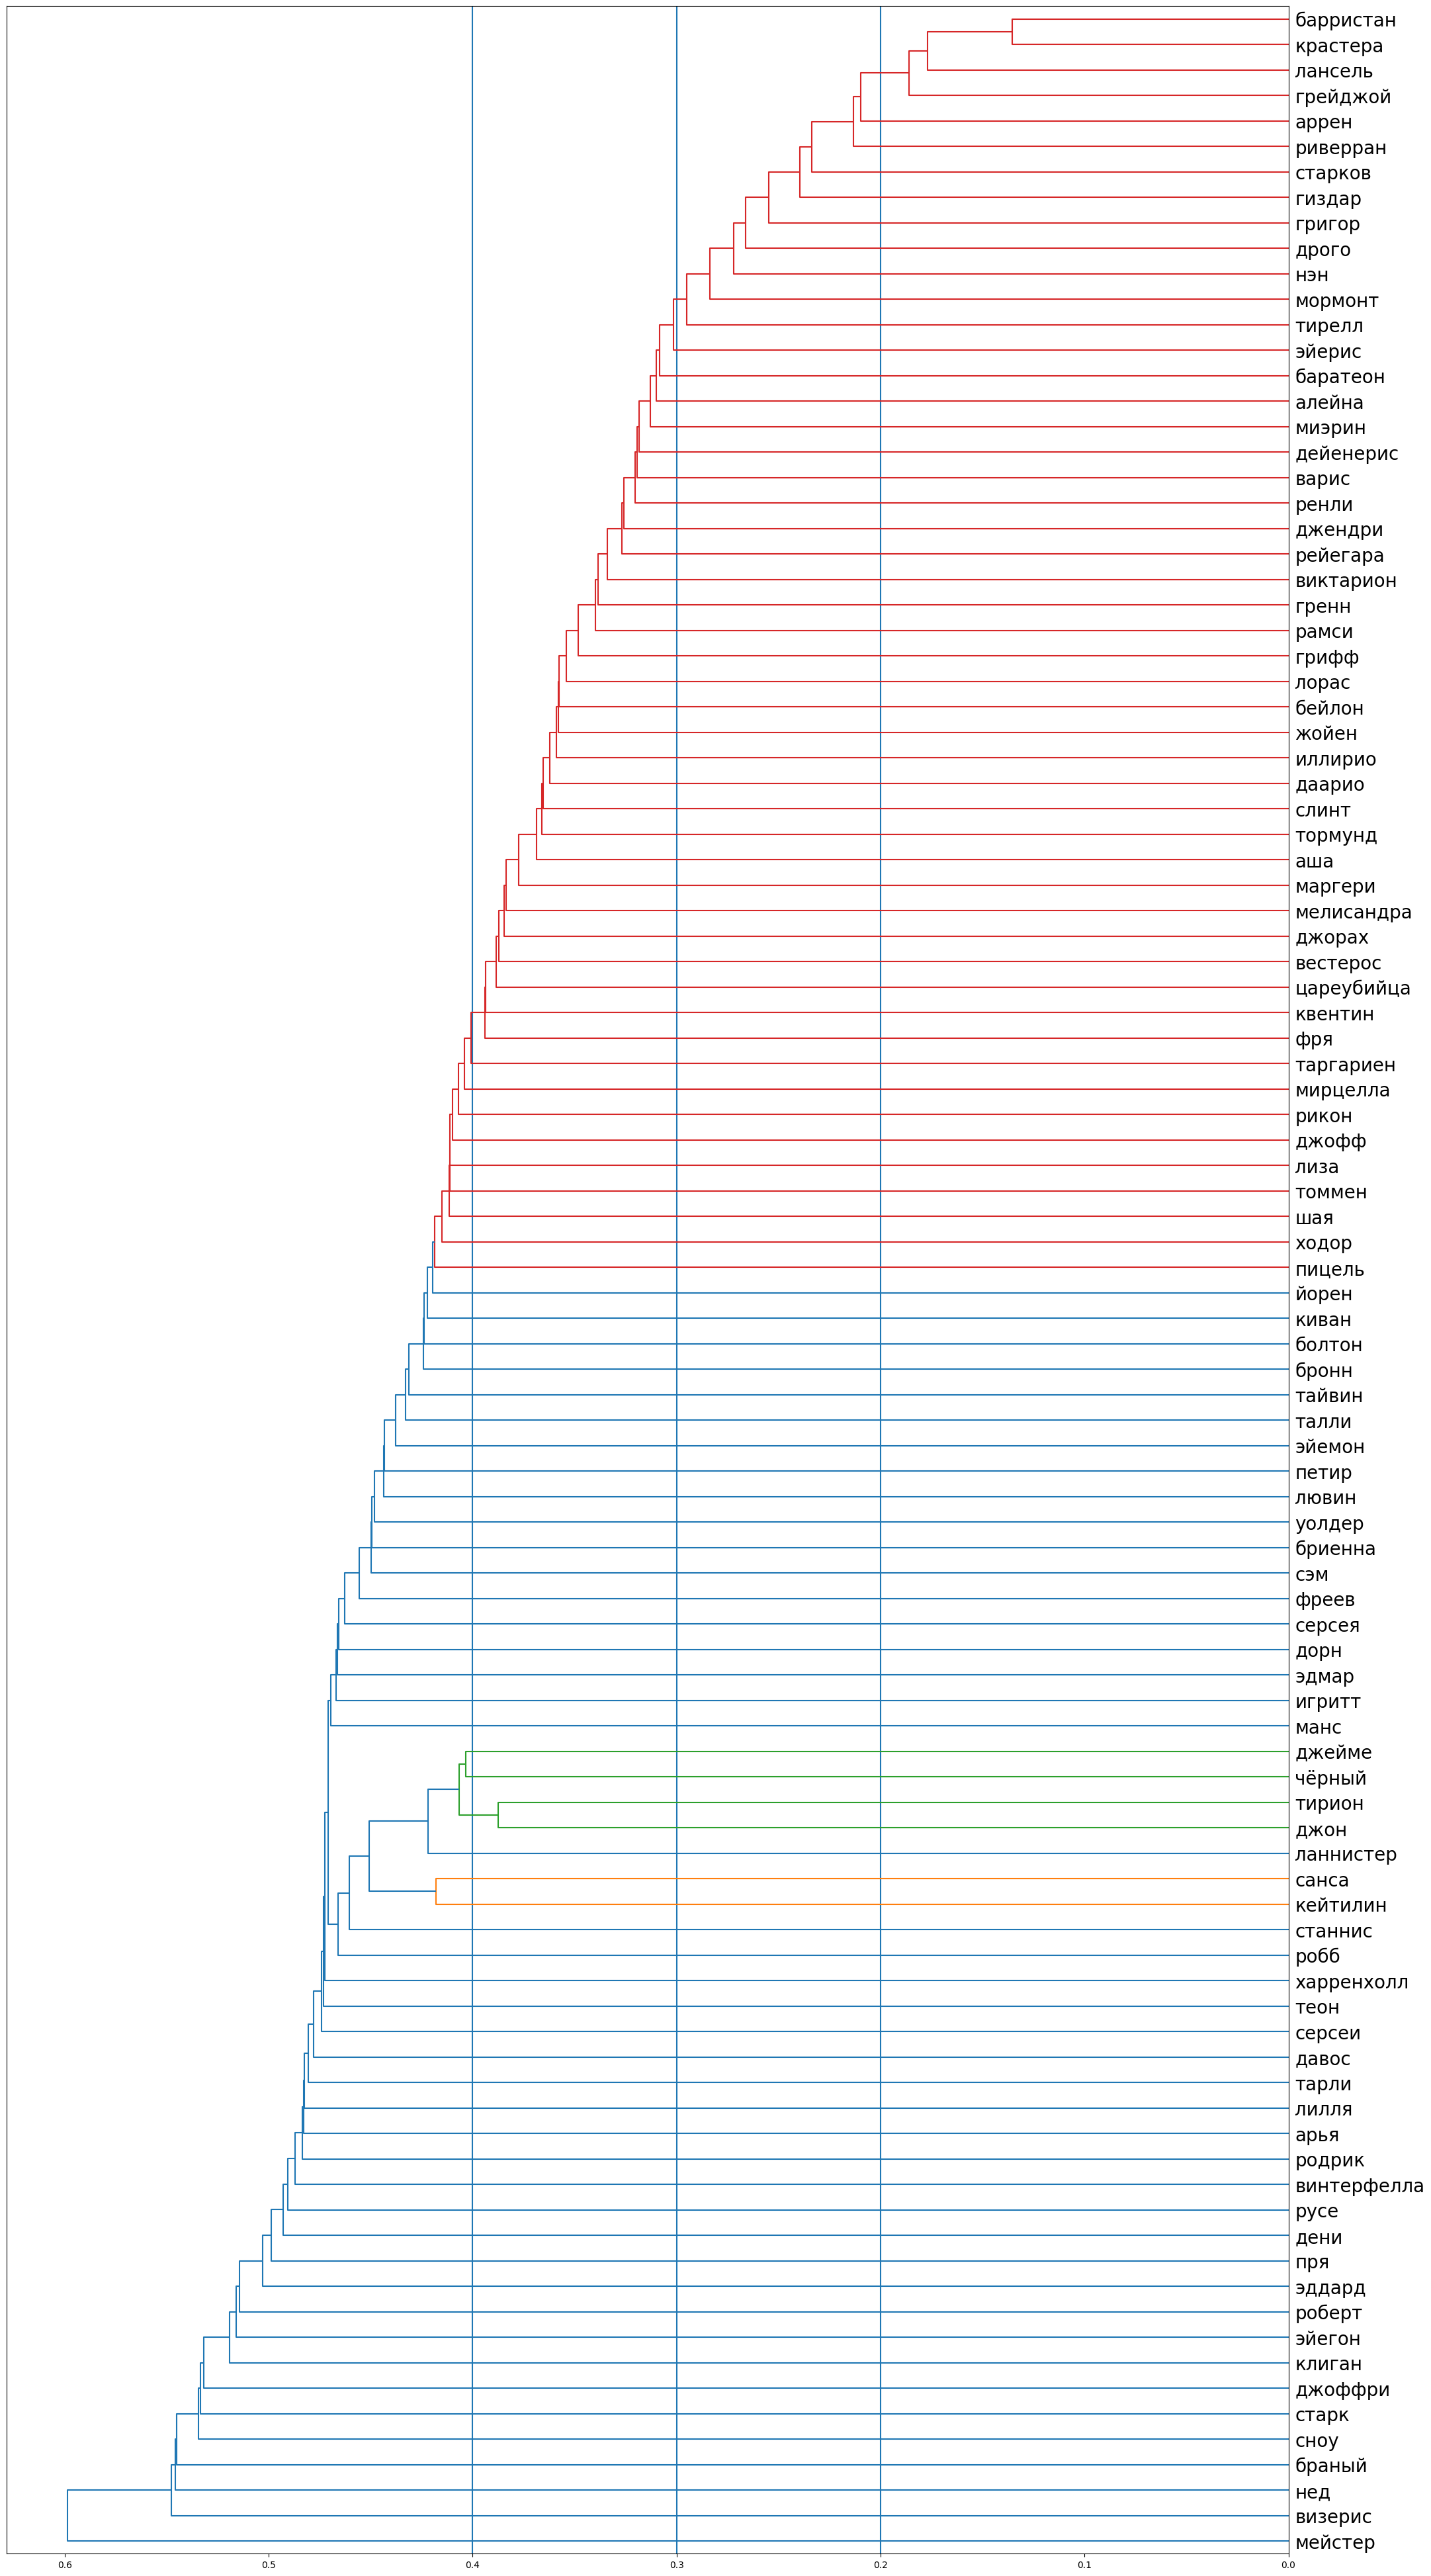

In [5]:
nonce = pd.read_csv(FOLDER/'Martin-better.csv', sep='\t')
nonce = nonce.drop(columns=nonce.columns[0])
nonce = nonce.iloc[:, :300]
tuned_version = nonce[nonce.index.isin(top_100_names)]
label = [id_to_nf[v] for v in tuned_version.index]
tuned_version = tuned_version.reset_index(drop=True)
plot_dendrogram(linkage(tuned_version, metric='cosine', optimal_ordering=False), label)

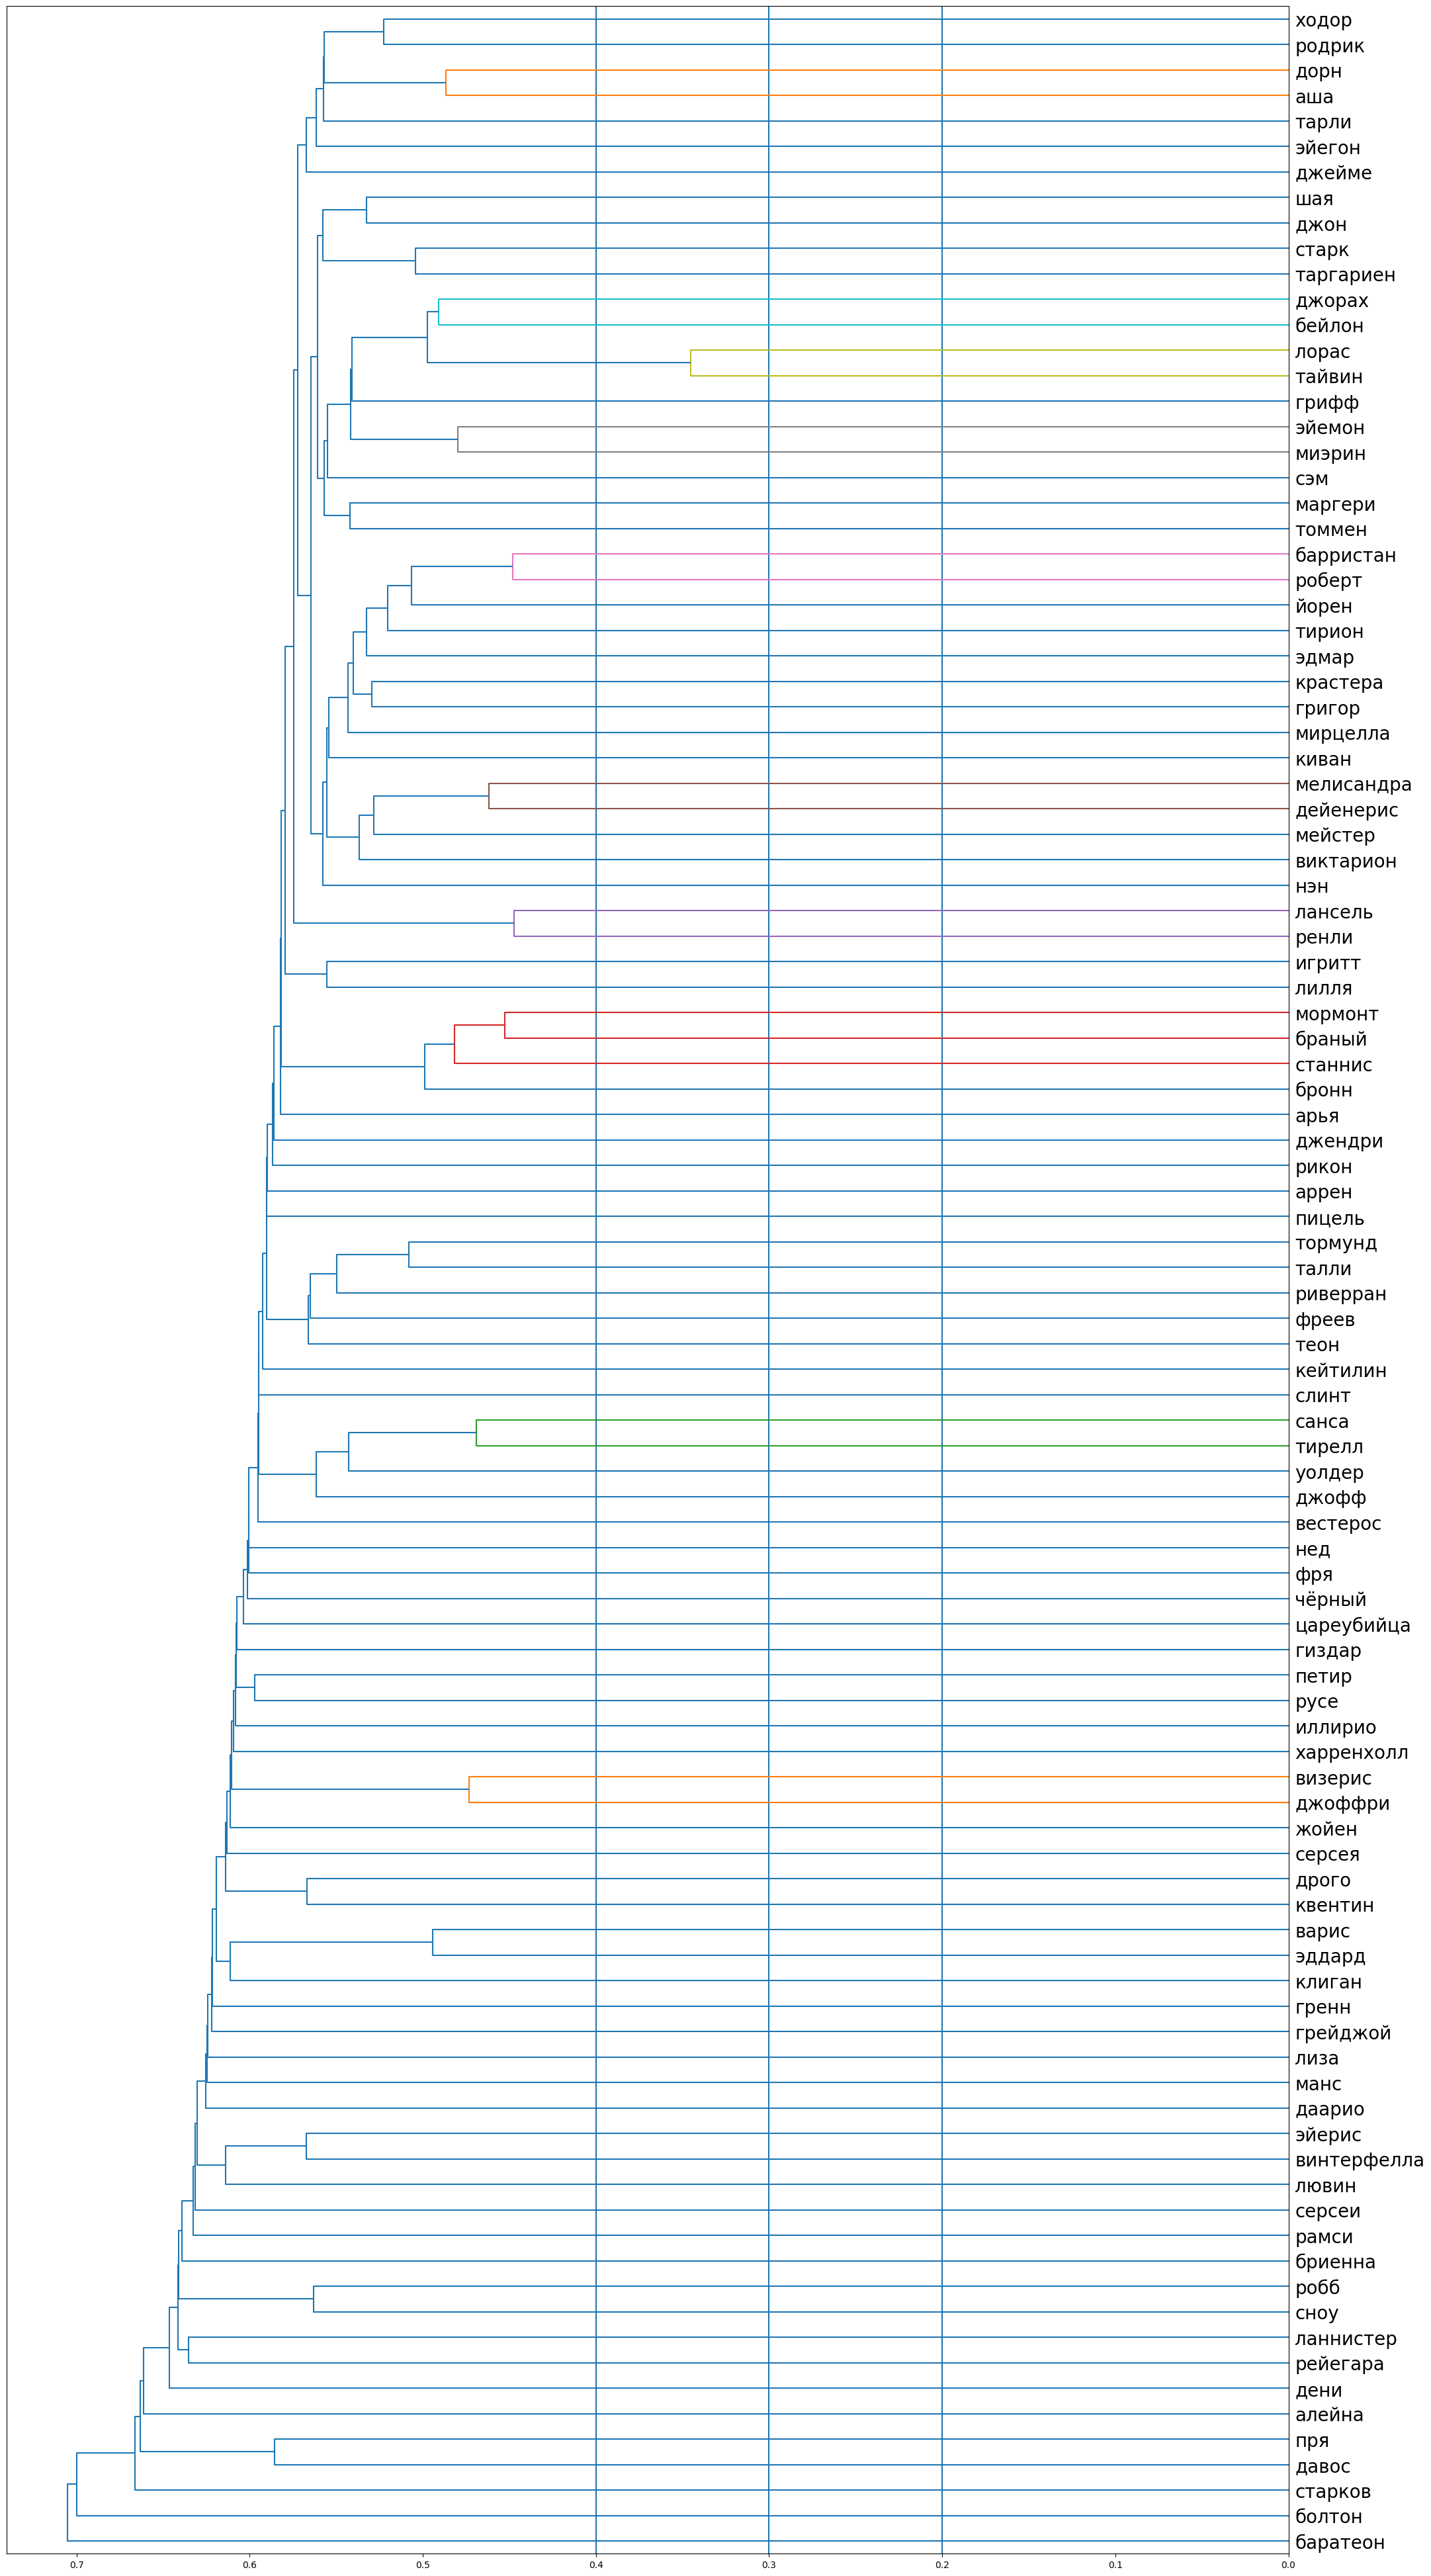

In [6]:
matrix_v = load_vectors(FOLDER/'2-output-i-30-200.txt')
matrix_v = matrix_v.iloc[:,:30][matrix_v.index.isin(top_100_names)]
matrix_v = matrix_v.reset_index(drop=True)
plot_dendrogram(linkage(matrix_v, metric='cosine', optimal_ordering=False), label)

In [7]:
leaf_metrics(tuned_version)

leaf depth min 0.40246151905624156
leaf depth median 0.4116342184831576
max leaf depth 0.598594633419351

leaf difference mean 0.00472653164101886
leaf difference median 0.00265435524881269
max leaf difference 0.05086339557761588

tree depth 92


In [8]:
leaf_metrics(matrix_v) 

leaf depth min 0.5690122869096373
leaf depth median 0.5671803904030843
max leaf depth 0.7050924277988799

leaf difference mean 0.0036718709244097404
leaf difference median 0.0015666433569249127
max leaf difference 0.10202090780230755

tree depth 55


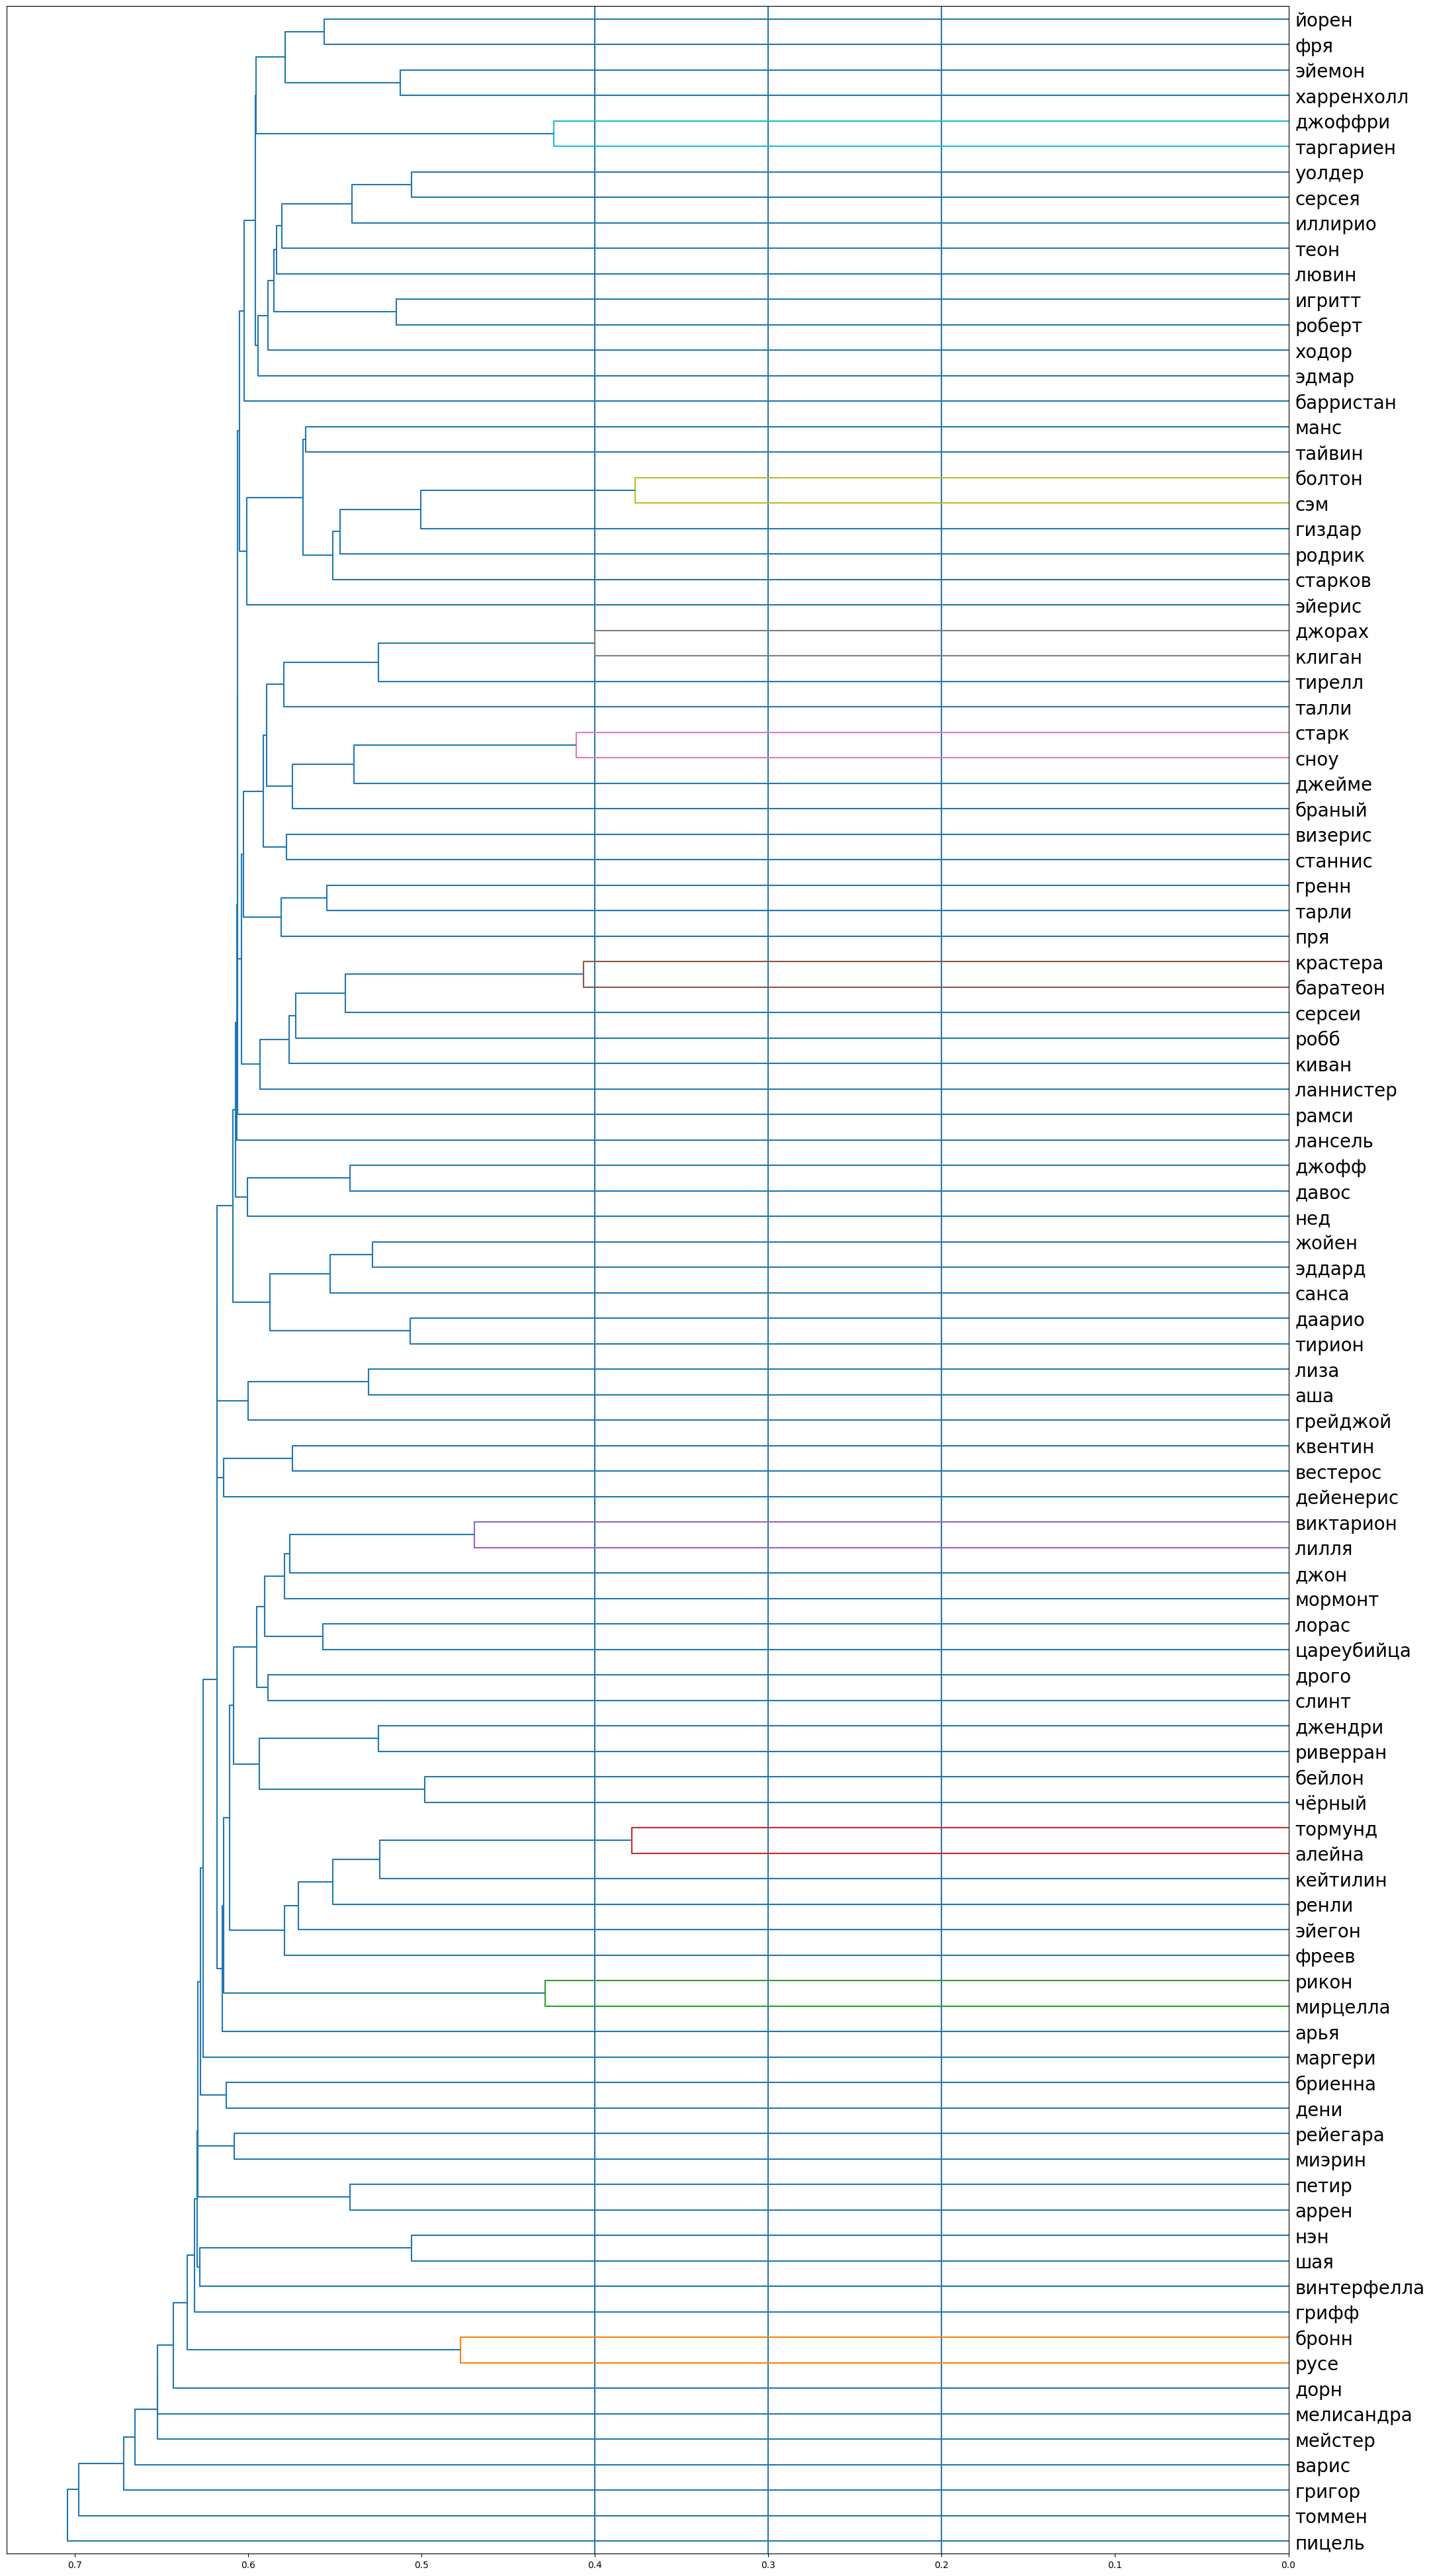

In [9]:
kv_v = load_vectors(FOLDER/'output-7kn-30-100.txt')
kv_v = kv_v.iloc[:,:30][kv_v.index.isin(top_100_names)]
kv_v = kv_v.reset_index(drop=True)
plot_dendrogram(linkage(kv_v, metric='cosine', optimal_ordering=False), label)

In [10]:
leaf_metrics(kv_v)

leaf depth min 0.571047548628888
leaf depth median 0.5852080789025385
max leaf depth 0.7040268940522527

leaf difference mean 0.003339352861391187
leaf difference median 0.001475671730724215
max leaf difference 0.04075485217947761

tree depth 33
